In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify = pd.read_csv('/content/drive/MyDrive/TCC Dataset/spotify_songs_2010_2019_normalized.csv')

In [ ]:
len(spotify['genre'].unique())

59

### 6. Análise e Exploração dos Dados

In [ ]:
spotify.groupby('genre')['genre'].count().nlargest(len(spotify['genre'].unique()))

genre
pop                                      436
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  126
hip hop, pop, Dance/Electronic            78
rock                                      59
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
R&B                                       21
hip hop, Dance/Electronic                 16
latin                                     15
hip hop, pop, latin                       14
pop, rock, metal                          14
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, pop, rock                         9
pop,

In [ ]:
import scipy.stats as stats 
from scipy.stats import mannwhitneyu, ttest_ind

value = 0.05

def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval < value: return False
    if pval < value: return False
  return True

def var_equals(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval < value: return False
  return True

def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_equals(group1,group2):
      #print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    #print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  #print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

In [ ]:
df_pop = spotify[(spotify['genre'] == 'pop')]
df_hip = spotify[(spotify['genre'] == 'hip hop, pop')]

columns = [col for col in spotify if (spotify[col].dtypes == 'bool' or spotify[col].dtypes == 'int64' or spotify[col].dtypes == 'float64') and col != 'year']

In [ ]:
dict_attributes = {}

for col in columns:
  dict_attributes[col] = stats_test(df_pop[col], df_hip[col])[1]
        
sorted_dict = sorted(dict_attributes.items(), key=lambda x: x[1])

print(sorted_dict)

[('explicit', 1.961874546417908e-49), ('speechiness', 7.710709203900771e-31), ('danceability', 2.8676173182287817e-16), ('acousticness', 1.980528618215196e-05), ('duration_ms', 0.00023632116510981355), ('popularity', 0.0010099046966430137), ('liveness', 0.014675488752474361), ('energy', 0.10289914455654882), ('mode', 0.1283688951859794), ('instrumentalness', 0.1410336135712635), ('key', 0.2635319887134895), ('tempo', 0.4067303370686205), ('loudness', 0.726104419087628), ('valence', 0.9139199039842809)]


In [ ]:
df_pop_hip = spotify[(spotify['genre'] == 'pop') | (spotify['genre'] == 'hip hop, pop')]
del df_pop_hip['year']

In [ ]:
def normalize(df):
  for col in df:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
      if col != 'loudness':
        df[col] = df[col]/df[col].max()
      else:
        df[col] = df[col].max()/df[col]
  
  return df

In [ ]:
normalize(df_pop_hip)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,artist,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,0.436149,False,0.875000,0.776629,0.834835,0.090909,4.011791,0.0,0.075868,0.307377,0.000026,0.470199,0.918808,0.466149,pop
4,*NSYNC,Bye Bye Bye,0.414255,False,0.738636,0.634953,0.928929,0.727273,3.541636,0.0,0.089583,0.041803,0.001501,0.111921,0.903392,0.846722,pop
10,Gigi D'Agostino,L'Amour Toujours,0.493155,False,0.011364,0.638056,0.728729,0.636364,5.845247,1.0,0.050694,0.033607,0.069553,0.476821,0.830421,0.681994,pop
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,0.555335,False,0.636364,0.770424,0.958959,0.636364,7.121592,1.0,0.049826,0.083299,0.467532,0.705960,0.986639,0.637347,pop
12,Bomfunk MC's,Freestyler,0.632729,False,0.625000,0.850052,0.922923,1.000000,4.272660,0.0,0.171701,0.029816,0.468975,0.333775,0.583762,0.803419,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,iann dior,gone girl,0.282080,True,0.784091,0.700103,0.714715,1.000000,4.154016,1.0,0.049826,0.165984,0.000000,0.094967,0.364851,0.465674,"hip hop, pop"
1990,Sam Smith,How Do You Sleep?,0.417651,False,0.829545,0.493278,0.682683,0.090909,3.633751,0.0,0.160590,0.156762,0.000000,0.101060,0.354573,0.542232,pop
1995,Jonas Brothers,Sucker,0.373908,False,0.897727,0.870734,0.734735,0.090909,3.732498,0.0,0.102083,0.043750,0.000000,0.140397,0.978417,0.676560,pop
1996,Taylor Swift,Cruel Summer,0.368538,False,0.886364,0.570838,0.702703,0.818182,4.205601,1.0,0.272569,0.119877,0.000030,0.139073,0.579651,0.833668,pop


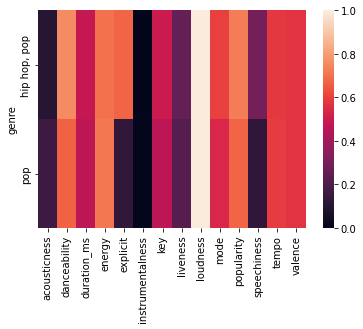

In [ ]:
sns.heatmap(df_pop_hip.pivot_table(
    index = 'genre',
    aggfunc = 'mean'
), vmin=0, vmax=1)

In [ ]:
def plot_boxplot(df, df2, attr):
  plt.figure(figsize =(9, 6))

  colors = ['blue', 'green']
  genres = ['Pop', 'Hip Hop/Pop']

  bplots = plt.boxplot([df[attr], df2[attr]], vert=1, patch_artist=False)

  for i, j in enumerate(bplots['boxes']):
    j.set(color=colors[i], linewidth=2, )

  plt.xlabel("Pop e Hip Hop")
  plt.ylabel(attr.upper())

  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


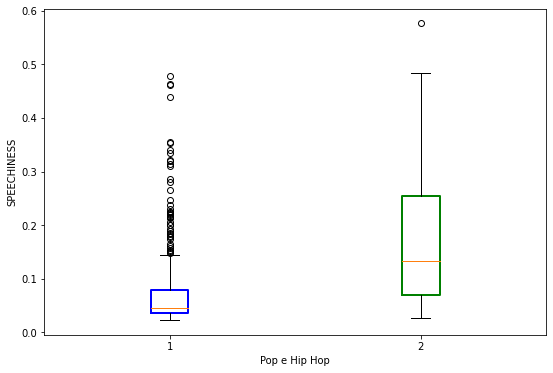

In [ ]:
plot_boxplot(df_pop, df_hip, 'speechiness')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


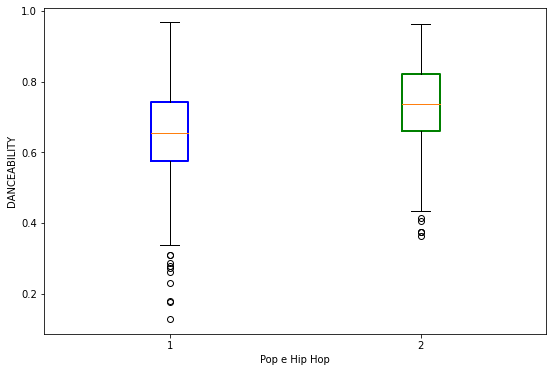

In [ ]:
plot_boxplot(df_pop, df_hip, 'danceability')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


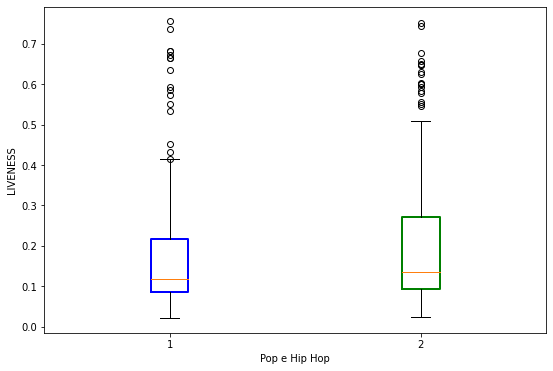

In [ ]:
plot_boxplot(df_pop, df_hip, 'liveness')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


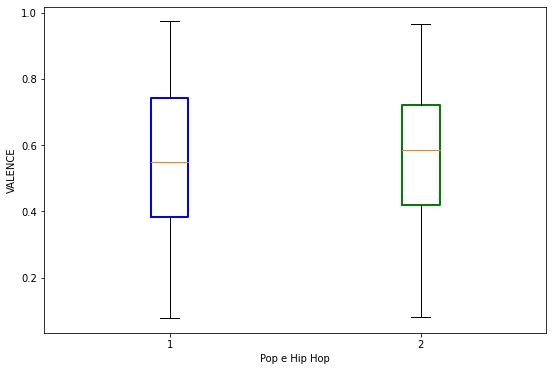

In [ ]:
plot_boxplot(df_pop, df_hip, 'valence')

### 7. Preparação dos Dados para os Modelos de Aprendizado de Máquina

In [ ]:
main_genre = pd.DataFrame({'genre': ( g.split(',')[0] for g in spotify['genre'])})

main_genre.groupby('genre')['genre'].count().nlargest(len(main_genre))

genre
pop                  944
hip hop              778
rock                 163
Dance/Electronic      41
R&B                   21
latin                 15
country               11
World/Traditional     10
metal                  9
Folk/Acoustic          4
Electronic             3
easy listening         1
Name: genre, dtype: int64

#### Avaliacao de agrupamento

In [ ]:
df_pop_all = spotify[spotify['genre'].str.contains('^pop', regex=True)]
df_hip_all = spotify[spotify['genre'].str.contains('^hip hop', regex=True)]

In [ ]:
del df_pop_all['year']
normalize(df_pop_all)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,artist,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,0.436149,False,0.875000,0.774227,0.834835,0.090909,0.050698,0.0,0.091423,0.307377,0.000018,0.423123,0.918808,0.450806,pop
2,Faith Hill,Breathe,0.517501,False,0.750000,0.545361,0.496496,0.636364,0.030643,1.0,0.060669,0.177254,0.000000,0.299166,0.285714,0.649079,"pop, country"
4,*NSYNC,Bye Bye Bye,0.414255,False,0.738636,0.632990,0.928929,0.727273,0.057428,0.0,0.107950,0.041803,0.001056,0.100715,0.903392,0.818853,pop
7,Robbie Williams,Rock DJ,0.534054,False,0.772727,0.729897,0.772773,0.636364,0.064728,1.0,0.067364,0.027357,0.000000,0.556615,0.884892,0.488663,"pop, rock"
8,Destiny's Child,Say My Name,0.560436,False,0.852273,0.735052,0.678679,0.454545,0.078298,0.0,0.213389,0.279713,0.000000,0.177592,0.754368,0.654533,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Normani,Motivation,0.400369,False,0.806818,0.617526,0.887888,0.363636,0.069574,1.0,0.205858,0.019672,0.000001,0.357569,0.905447,0.810610,"pop, R&B"
1993,Joel Corry,Sorry,0.389635,False,0.715909,0.767010,0.790791,0.727273,0.059779,0.0,0.117573,0.056045,0.000814,0.381406,0.870504,0.592845,"pop, Dance/Electronic"
1995,Jonas Brothers,Sucker,0.373908,False,0.897727,0.868041,0.734735,0.090909,0.054492,0.0,0.123013,0.043750,0.000000,0.126341,0.978417,0.654291,pop
1996,Taylor Swift,Cruel Summer,0.368538,False,0.886364,0.569072,0.702703,0.818182,0.048362,1.0,0.328452,0.119877,0.000021,0.125149,0.579651,0.806228,pop


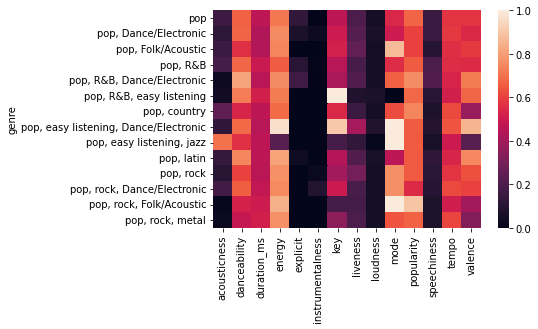

In [ ]:
sns.heatmap(df_pop_all.pivot_table(
    index = 'genre',
    aggfunc = 'mean'
), vmin=0, vmax=1)

In [ ]:
del df_hip_all['year']
normalize(df_hip_all)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,artist,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
5,Sisqo,Thong Song,0.627887,True,0.793103,0.724103,0.908905,0.181818,0.171002,1.0,0.113542,0.125926,0.000128,0.083037,0.734568,0.596088,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,0.703281,True,0.988506,0.973333,0.676561,0.454545,0.280396,0.0,0.099306,0.031958,0.000000,0.053855,0.781893,0.512498,hip hop
15,Aaliyah,Try Again,0.702786,False,0.609195,0.817436,0.636643,0.545455,0.210918,0.0,0.503472,0.085397,0.000000,0.099763,0.752058,0.456179,"hip hop, pop, R&B"
19,Dr. Dre,The Next Episode,0.399662,True,0.942529,0.945641,0.930399,0.909091,0.489914,0.0,0.468750,0.029735,0.000000,0.101542,0.317901,0.467336,hip hop
23,M.O.P.,Cold as Ice,0.604955,True,0.620690,0.672821,0.900716,1.000000,0.219355,0.0,0.248264,0.044550,0.000000,0.348754,0.779835,0.419619,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Post Malone,Better Now,0.572290,True,0.919540,0.697436,0.591607,0.909091,0.205031,1.0,0.069444,0.350265,0.000000,0.160142,0.350823,0.711281,hip hop
1987,iann dior,gone girl,0.337951,True,0.793103,0.694359,0.730809,1.000000,0.211105,1.0,0.049826,0.171429,0.000000,0.085053,0.365226,0.465674,"hip hop, pop"
1994,Post Malone,Goodbyes (Feat. Young Thug),0.432956,True,0.011494,0.594872,0.668373,0.454545,0.311682,1.0,0.129340,0.473016,0.000000,0.131673,0.180041,0.736748,hip hop
1997,Blanco Brown,The Git Up,0.496387,False,0.793103,0.868718,0.693961,0.818182,0.137811,1.0,0.189236,0.070794,0.000000,0.325030,0.834362,0.480523,"hip hop, country"


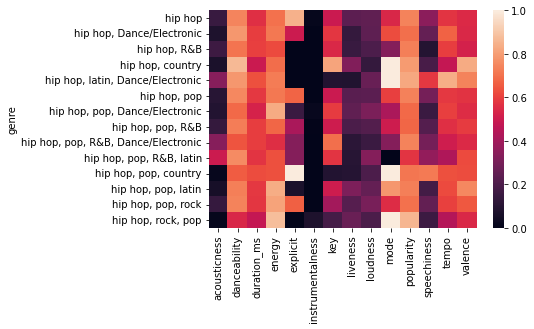

In [ ]:
sns.heatmap(df_hip_all.pivot_table(
    index = 'genre',
    aggfunc = 'mean'
), vmin=0, vmax=1)

In [ ]:
df_pop_all['genre'] = 'pop'
df_hip_all['genre'] = 'hip hop'

df_merge = pd.concat([df_pop_all, df_hip_all])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(df_merge)

1722

#### Verificacao pos agrupamento

In [60]:
dict_attributes = {}

for col in columns:
  dict_attributes[col] = stats_test(df_pop_all[col], df_hip_all[col])[1]
        
sorted_dict = sorted(dict_attributes.items(), key=lambda x: x[1])

print(sorted_dict)

[('explicit', 9.574864016347841e-91), ('speechiness', 8.18946008152169e-56), ('danceability', 4.650657520636517e-27), ('duration_ms', 6.527008574949913e-07), ('popularity', 1.092609534752009e-05), ('acousticness', 0.0002901047326762601), ('energy', 0.0020738757056897317), ('instrumentalness', 0.005227312169813102), ('key', 0.013655164530831336), ('liveness', 0.034257732495010386), ('tempo', 0.051397238539739536), ('valence', 0.2421208993693594), ('loudness', 0.3462797105382728), ('mode', 0.8007881539658439)]
